Verificando informações referentes a sexagem de animais.

Existe alguma diferença entre o número de registros de nascimentos de camundongos machos em relação às fêmeas por linhagem ?

Objetivo: Buscar padrões que sejam capazes de caracterizar a criação animal no biotério do ICC

Hipótese: Existe uma maior produção de fêmeas em comparação aos machos.

In [20]:
#Importando bibliotecas necessárias para a análise.

import matplotlib.pyplot as plt 
import pandas as pd 
import os
import seaborn as sns


plt.rcParams.update({'font.size': 20}) #tamanho da fonte
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20 #tamanho da fonte

Verificando informações referente aos machos

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ MACHOS +++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [21]:
#Filtros para trabalhar com os dados da minha dataframe original

sexa_ani_m = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
sexa_ani_m = sexa_ani_m[
    (sexa_ani_m['num_sex_m'] < 200) &
    (sexa_ani_m['util'] == 'sex') &
    (sexa_ani_m['ling'] != 'Test') &
    (sexa_ani_m['num_sex_m'] != 666)
]
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    sexa_ani_m[d] = pd.to_datetime(sexa_ani_m[d], unit = 's')
    
sexa_ani_m.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
458,2014-10-30 12:06:36,Tania,S129WT,4,m,2014-10-21 12:43:17,374,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,4,666,666,666,AAA,AAA
465,2014-10-30 12:34:35,Tania,Swiss E,16,m,2014-10-06 18:11:54,463,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,3,666,666,666,AAA,I
467,2014-10-30 12:34:35,Tania,Swiss E,13,m,2014-10-06 18:11:54,465,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,3,666,666,666,AAA,I
489,2014-11-05 17:13:53,Tania,S129WT,666,m,2014-10-21 12:43:17,376,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-05 17:13:53,4,666,666,666,AAA,AAA
517,2014-11-11 12:26:51,Tania,C57BL06WT,6,m,2014-11-11 12:25:07,515,sex,666,1970-01-01 00:11:06,...,2014-11-11 12:26:51,2014-11-11 12:26:51,6,2014-11-11 12:26:51,4,666,666,666,AAA,AAA


In [22]:
q1 = sexa_ani_m['num_ani'].quantile(0.25) #filtro para a retirada dos valores discrepantes
q3 = sexa_ani_m['num_ani'].quantile(0.75)
iqr = q3 - q1

sem_out_m = sexa_ani_m[(sexa_ani_m['num_ani'] > (q1 - 1.5 * iqr)) & (sexa_ani_m['num_ani'] < (q3 + 1.5 * iqr))]#dataframe
sem_out_m.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
458,2014-10-30 12:06:36,Tania,S129WT,4,m,2014-10-21 12:43:17,374,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,4,666,666,666,AAA,AAA
465,2014-10-30 12:34:35,Tania,Swiss E,16,m,2014-10-06 18:11:54,463,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,3,666,666,666,AAA,I
467,2014-10-30 12:34:35,Tania,Swiss E,13,m,2014-10-06 18:11:54,465,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,3,666,666,666,AAA,I
489,2014-11-05 17:13:53,Tania,S129WT,666,m,2014-10-21 12:43:17,376,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-05 17:13:53,4,666,666,666,AAA,AAA
517,2014-11-11 12:26:51,Tania,C57BL06WT,6,m,2014-11-11 12:25:07,515,sex,666,1970-01-01 00:11:06,...,2014-11-11 12:26:51,2014-11-11 12:26:51,6,2014-11-11 12:26:51,4,666,666,666,AAA,AAA


In [23]:
sem_out_m['ling'].value_counts()

Balb/c         371
C57BL/6        352
S129KO         197
C3H             89
129/SV-E        83
Swiss-2 D       45
Swiss-1 B       31
Swiss-2 C       30
Swiss-1 A       29
Swiss-2 E       28
Swiss-2 B       27
Swiss-1 E       26
S129WT          25
Swiss-2 A       25
Swiss-1 C       24
C57BL06WT       24
Swiss-1 D       24
Swiss A         14
Swiss C         11
Swiss E         11
Swiss D         11
Swiss B         10
 S129WT          7
Swiss/CFW C      7
AG129            6
Swiss/CFW B      6
Swiss/CFW        6
Swiss/CFW A      4
Swiss/CFW D      3
 S129KO          3
Name: ling, dtype: int64

In [24]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

sem_out_m['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
#sexa_ani[(sexa_ani['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

sem_out_m['ling'].replace(' S129KO', 'S129KO', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

sem_out_m['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

sem_out_m['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

sem_out_m['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

sem_out_m['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

sem_out_m['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

sem_out_m['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 E')].info()
'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

sem_out_m['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'Swiss-1 E')].info()

In [25]:
sem_out_m['ling'].value_counts()

C57BL/6      376
Balb/c       371
S129KO       200
129/SV-E     115
C3H           89
Swiss-1 A     53
Swiss-1 B     47
Swiss-2 D     45
Swiss-1 C     42
Swiss-1 D     38
Swiss-1 E     37
Swiss-2 C     30
Swiss-2 E     28
Swiss-2 B     27
Swiss-2 A     25
AG129          6
Name: ling, dtype: int64

In [26]:
media_g = sem_out_m.groupby('ling')
media_plot = round(media_g['num_sex_m'].sum().mean(),2)
media_plot

328.62

In [38]:
mediana_g = sem_out_m.groupby('ling')
mediana_plot = round(mediana_g['num_sex_m'].sum().median(),2)
mediana_plot

151.5

Text(0, 0.5, 'Linhagens')

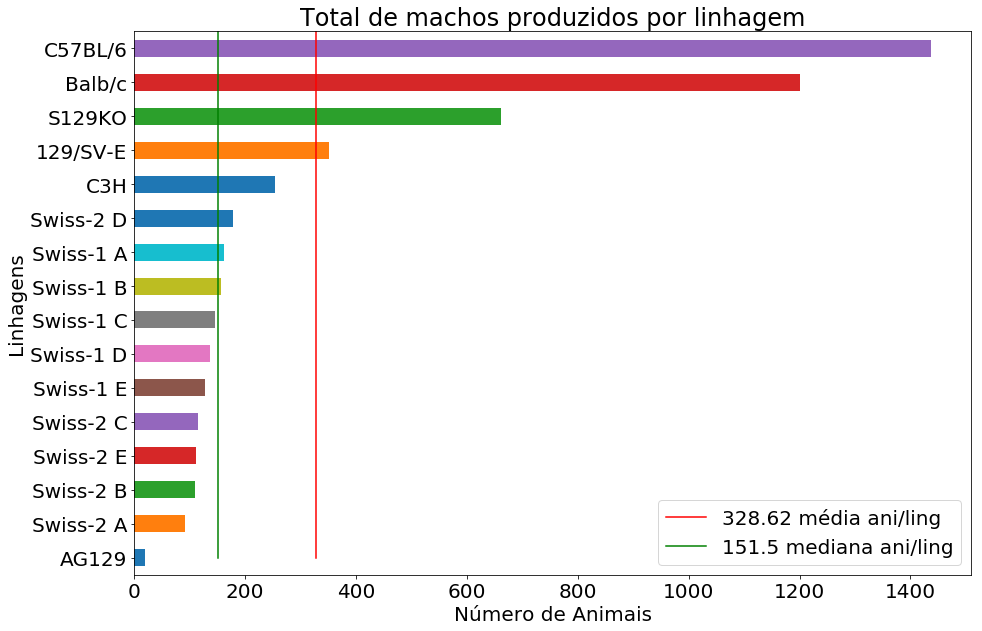

In [39]:
#Numero total de machos produzidos 

plt.figure(figsize=(15,10)) #tamanho do gráfico
plt.title('Total de machos produzidos por linhagem') #título do gráfico

plot = sem_out_m.groupby('ling') #pedindo pra agrupar por linhagem
plot['num_sex_m'].sum().sort_values(ascending=True).plot( #plotando a soma de animais e ordenando do maior para o menor
kind='barh'
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_plot, media_plot], #faixa que marca a média
    [len(sem_out_m.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_plot, mediana_plot], #faixa que marca a mediana
    [len(sem_out_m.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_plot) + ' média ani/ling', str(mediana_plot) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y

In [40]:
media_mg = sem_out_m.groupby('ling')                    #Agrupando minha dataframe por linhagem
mediana = round(media_mg['num_sex_m'].median(),2)      #Pegando as medianas da coluna 'num_sex_m', arredondando e guardando numa variável
media_grafico = round(mediana.mean(),2)                #Calculando a média das minhas medianas e guardando em outra variavel
media_grafico

3.47

In [41]:
mediana_grafico = round(mediana.median(),2)          #peguei a variável que continha minhas medianas e calculei a mediana das medianas.
mediana_grafico

3.25

Text(0, 0.5, 'Linhagens')

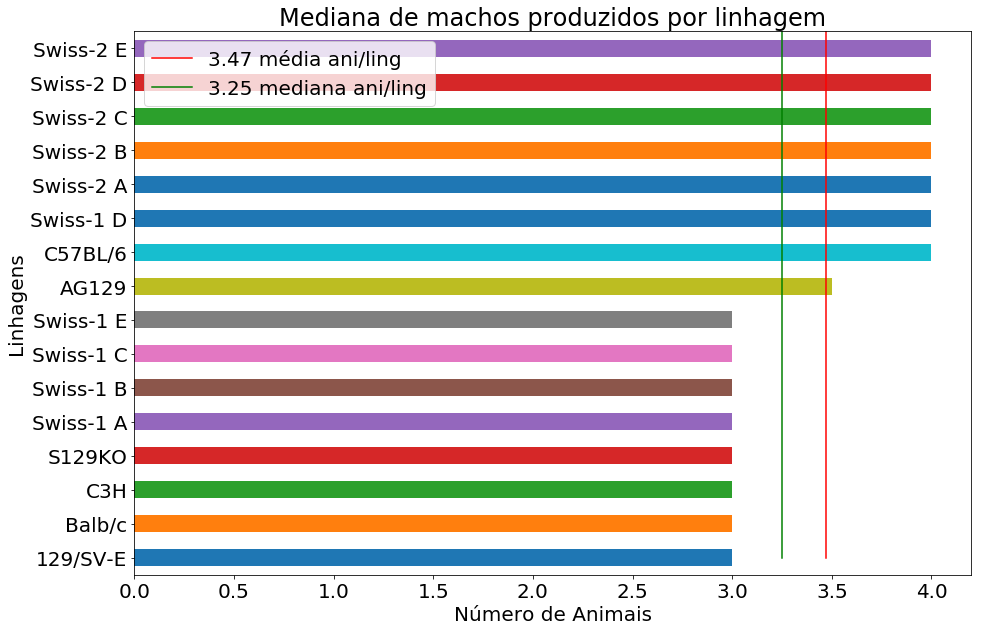

In [42]:
# Calculando a mediana da produção de animais machos

plt.figure(figsize=(15,10)) #tamanho do gráfico
plt.title('Mediana de machos produzidos por linhagem') #título do gráfico

plot = sem_out_m.groupby('ling') #pedindo pra agrupar por linhagem
plot['num_sex_m'].median().sort_values(ascending=True).plot( #plotando a soma de animais e ordenando do maior para o menor
kind='barh'
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_grafico, media_grafico], #faixa que marca a média
    [len(sem_out_m.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_grafico, mediana_grafico], #faixa que marca a mediana
    [len(sem_out_m.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_grafico) + ' média ani/ling', str(mediana_grafico) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y

In [13]:
# plt.figure(figsize=(15,15))
# plt.title('Total de machos por linhagem apresentando outliers')
# sns.boxplot(
    
#     y='ling',
#     x='num_sex_m',
# #     hue='ling',
#     data=sexa_ani_m.sort_values('ling')
# )
# plt.xlabel('Número de Animais com outliers') #definindo nome do eixo X
# plt.ylabel('Linhagens') #definindo nome do eixo Y


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ FEMEAS ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [43]:
#Filtros para trabalhar com os dados da minha dataframe original

sexa_ani_f = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
sexa_ani_f = sexa_ani_f[
    (sexa_ani_f['num_sex_f'] < 200) &
    (sexa_ani_f['util'] == 'sex') &
    (sexa_ani_f['ling'] != 'Test') &
    (sexa_ani_f['num_sex_f'] != 666)
]
                   


#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Alterando formato da data

datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex']

for d in datas:
    sexa_ani_f[d] = pd.to_datetime(sexa_ani_f[d], unit = 's')
    
sexa_ani_f.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
460,2014-10-30 12:06:36,Tania,S129WT,2,f,2014-10-21 12:43:17,458,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,666,2,666,666,AAA,AAA
463,2014-10-30 12:34:35,Tania,Swiss E,19,f,2014-10-06 18:11:54,454,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,666,3,666,666,AAA,I
491,2014-11-05 17:13:53,Tania,S129WT,665,f,2014-10-21 12:43:17,489,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-05 17:13:53,666,1,666,666,AAA,AAA
515,2014-11-11 12:26:51,Tania,C57BL06WT,4,f,2014-11-11 12:25:07,513,sex,666,1970-01-01 00:11:06,...,2014-11-11 12:26:51,2014-11-11 12:26:51,6,2014-11-11 12:26:51,666,2,666,666,AAA,AAA
534,2014-11-12 12:47:13,Tania,S129WT,1,f,2014-10-21 12:43:17,375,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-12 12:47:13,666,1,666,666,AAA,AAA


In [44]:
q1 = sexa_ani_f['num_ani'].quantile(0.25) #filtro para a retirada dos valores discrepantes
q3 = sexa_ani_f['num_ani'].quantile(0.75)
iqr = q3 - q1

sem_out_f = sexa_ani_f[(sexa_ani_f['num_ani'] > (q1 - 1.5 * iqr)) & (sexa_ani_f['num_ani'] < (q3 + 1.5 * iqr))]#dataframe
sem_out_f.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
460,2014-10-30 12:06:36,Tania,S129WT,2,f,2014-10-21 12:43:17,458,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:06:36,666,2,666,666,AAA,AAA
463,2014-10-30 12:34:35,Tania,Swiss E,19,f,2014-10-06 18:11:54,454,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-10-30 12:34:35,666,3,666,666,AAA,I
491,2014-11-05 17:13:53,Tania,S129WT,665,f,2014-10-21 12:43:17,489,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-05 17:13:53,666,1,666,666,AAA,AAA
515,2014-11-11 12:26:51,Tania,C57BL06WT,4,f,2014-11-11 12:25:07,513,sex,666,1970-01-01 00:11:06,...,2014-11-11 12:26:51,2014-11-11 12:26:51,6,2014-11-11 12:26:51,666,2,666,666,AAA,AAA
534,2014-11-12 12:47:13,Tania,S129WT,1,f,2014-10-21 12:43:17,375,sex,666,1970-01-01 00:11:06,...,1970-01-01 00:11:06,1970-01-01 00:11:06,666,2014-11-12 12:47:13,666,1,666,666,AAA,AAA


In [45]:
#Substituindo linhagens  - ' S129WT', 'S129WT'] PARA '129/SV-E'

sem_out_f['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

sem_out_f['ling'].replace(' S129KO', 'S129KO', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

sem_out_f['ling'].replace(['C57BL06WT','C57BL06WT\t'], 'C57BL/6', inplace=True)
#sexa_ani[(sexa_ani['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

sem_out_f['ling'].replace(['Swiss A','Swiss/CFW', 'Swiss/CFW A'], 'Swiss-1 A', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

sem_out_f['ling'].replace(['Swiss B','Swiss/CFW B'], 'Swiss-1 B', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

sem_out_f['ling'].replace(['Swiss C','Swiss/CFW C'], 'Swiss-1 C', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

sem_out_f['ling'].replace(['Swiss D','Swiss/CFW D'], 'Swiss-1 D', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

sem_out_f['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss-2 A' PARA 'Swiss-2 A'

sem_out_f['ling'].replace('Swiss-2 A ', 'Swiss-2 A', inplace=True)


In [46]:
media_f = sem_out_f.groupby('ling')
media_plot_total_f = round(media_f['num_sex_f'].sum().mean(),2)
media_plot_total_f

316.19

In [47]:
mediana_f = sem_out_f.groupby('ling')
mediana_plot_total_f = round(mediana_f['num_sex_f'].sum().median(),2)
mediana_plot_total_f

128.5

In [53]:
g_ling = sem_out_m.groupby('ling')
g_ling['num_sex_m'].sum()

ling
129/SV-E      352
AG129          19
Balb/c       1200
C3H           253
C57BL/6      1438
S129KO        662
Swiss-1 A     162
Swiss-1 B     157
Swiss-1 C     146
Swiss-1 D     137
Swiss-1 E     128
Swiss-2 A      92
Swiss-2 B     109
Swiss-2 C     114
Swiss-2 D     178
Swiss-2 E     111
Name: num_sex_m, dtype: int64

In [52]:
g_ling = sem_out_f.groupby('ling')
g_ling['num_sex_f'].sum()

ling
129/SV-E      351
AG129          14
Balb/c       1534
C3H           222
C57BL/6      1204
S129KO        591
Swiss-1 A     193
Swiss-1 B     134
Swiss-1 C     123
Swiss-1 D     111
Swiss-1 E     138
Swiss-2 A      82
Swiss-2 B      92
Swiss-2 C      96
Swiss-2 D      94
Swiss-2 E      80
Name: num_sex_f, dtype: int64

Text(0, 0.5, 'Linhagens')

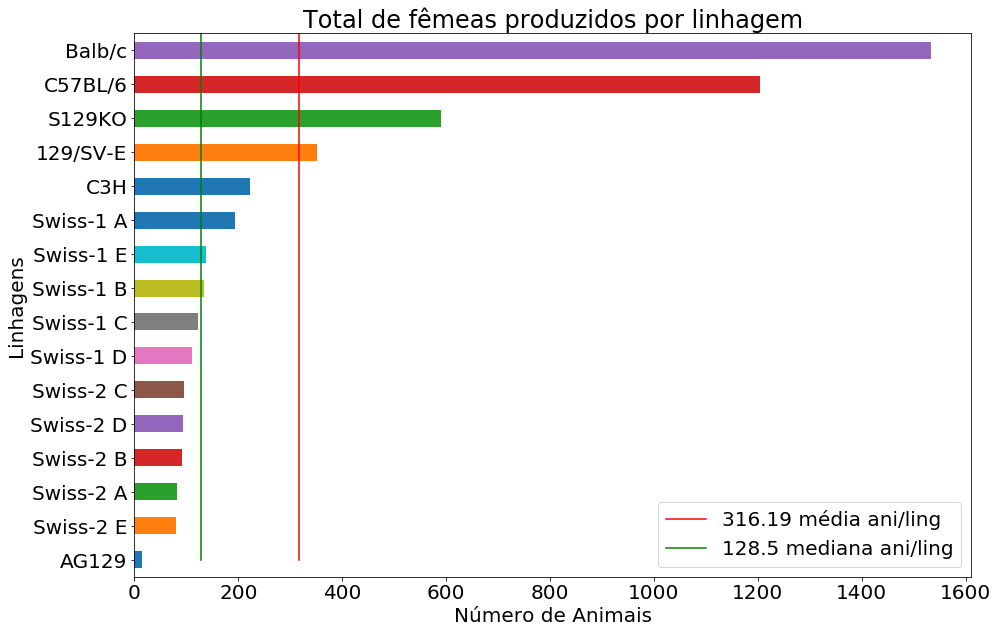

In [54]:
#Numero total de femeas produzidos 

plt.figure(figsize=(15,10)) #tamanho do gráfico
plt.title('Total de fêmeas produzidos por linhagem') #título do gráfico

plot = sem_out_f.groupby('ling') #pedindo pra agrupar por linhagem
plot['num_sex_f'].sum().sort_values(ascending=True).plot( #plotando a soma de animais e ordenando do maior para o menor
kind='barh'
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [media_plot_total_f, media_plot_total_f], #faixa que marca a média
    [len(sem_out_m.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [mediana_plot_total_f, mediana_plot_total_f], #faixa que marca a mediana
    [len(sem_out_m.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(media_plot_total_f) + ' média ani/ling', str(mediana_plot_total_f) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y

In [72]:
#Calculando a mediana e a partir dela a média
media_fg = sem_out_f.groupby('ling')                    #Agrupando minha dataframe por linhagem
medianas_f = round(media_fg['num_sex_f'].median(),2)    #Calculando a mediana por linhagem e guardando dentro de uma variável
plot_medias_f = round(medianas_f.mean(),2)              #A partir das medianas calculando a média e guardando os valores dentro de outra variável
plot_medias_f                                           #gerando a média de uma mediana.

3.38

In [75]:
#Calculando a mediana a partir da mediana
mediana_fg = sem_out_f.groupby('ling')                #Agrupando meu DataFrame por linhagem
plot_mediana_f = round(medianas_f.median(),2)         #Como já tinha uma variável que continha a mediana (calculado acima) só repeti e guardei a mediana em outra
plot_mediana_f                                        #gerando a mediana de uma mediana

3.0

Text(0, 0.5, 'Linhagens')

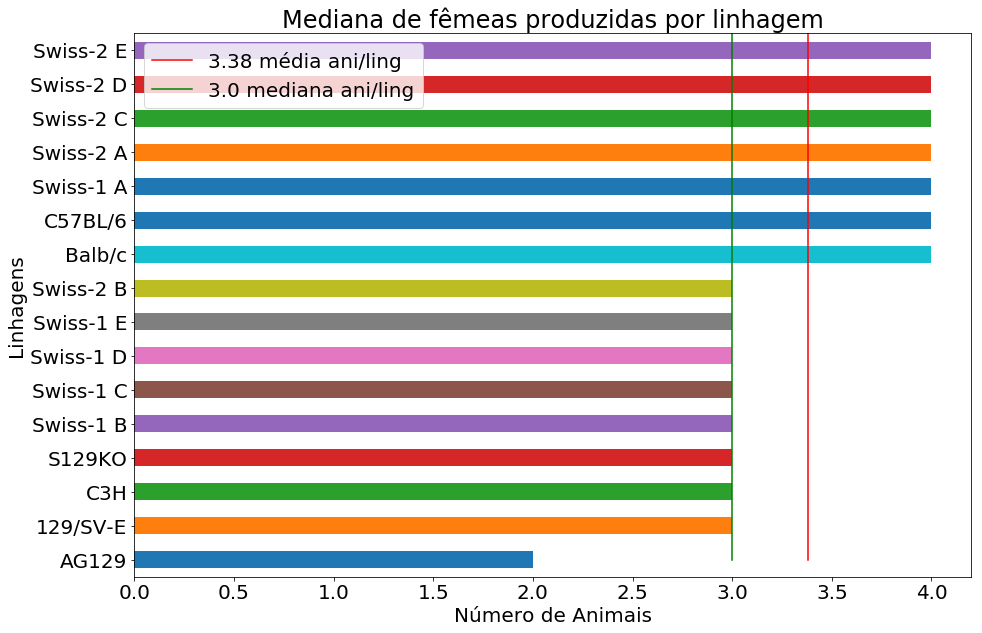

In [76]:
# Calculando a mediana da produção de animais machos

plt.figure(figsize=(15,10)) #tamanho do gráfico
plt.title('Mediana de fêmeas produzidas por linhagem') #título do gráfico

plot = sem_out_f.groupby('ling') #pedindo pra agrupar por linhagem
plot['num_sex_f'].median().sort_values(ascending=True).plot( #plotando a soma de animais e ordenando do maior para o menor
kind='barh'
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#plotando faixas de média e mediana


plt.plot( #função para plotar o gráfico
    [plot_medias_f, plot_medias_f], #faixa que marca a média
    [len(sem_out_f.index), 0], 
    c='red' #cor vermelha da faixa
)
plt.plot( #função para plotar o gráfico
    [plot_mediana_f, plot_mediana_f], #faixa que marca a mediana
    [len(sem_out_f.index), 0], 
    c='green' #cor verde da faixa
)
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#Editando as legendas 

plt.legend([str(plot_medias_f) + ' média ani/ling', str(plot_mediana_f) + ' mediana ani/ling'])
plt.xlabel('Número de Animais') #definindo nome do eixo X
plt.ylabel('Linhagens') #definindo nome do eixo Y

Resultado: Em algumas linhagens os registros retornam uma produção de fêmeas superior aos machos, como no caso da linhagem Balb/c e C57BL/6, porém, avaliando todas as linhagens como um todo, e calculando a mediana para todas as linhagens a mediana para produção de machos está entre 3,25 a 4 filhotes machos por evento de nascimento. Já as fêmeas foram registradas uma mediana de 3,38 a 4,0 filhotes por evento, respeitando a proporção de 1:1.